In [56]:
%load_ext autoreload
%autoreload 2

from CrossSection import CrossSection

chs_profile = CrossSection('cross-sections/CHS33.7x2.6/profile.svg')
l_profile = CrossSection('cross-sections/L35x35x4/profile.svg')
L_profile = CrossSection('cross-sections/L60x40x6/profile.svg')
L2_profile = CrossSection('cross-sections/L56x36x4/profile.svg')
RHS_profile = CrossSection('cross-sections/RHS90x50x4/profile.svg')
T70_profile = CrossSection('cross-sections/T70/profile.svg')
UPN50_profile = CrossSection('cross-sections/UPN50/profile.svg')

# chs_profile.header_width, chs_profile.area, l_profile.header_width, l_profile.area, L_profile.header_width, L_profile.area, 
check = (chs_profile.has_holes, l_profile.has_holes,
         L_profile.has_holes, L2_profile.has_holes, 
         RHS_profile.has_holes, T70_profile.has_holes,
         UPN50_profile.has_holes)

check

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(True, False, False, False, True, False, False)

In [49]:
import pandas as pd

# List of your loaded section objects and their display names
data_rows = []
sections = {
    "CHS 33.7x2.6": chs_profile,
    "L 35x35x4": l_profile,
    "L 60x40x6": L_profile,
    "L 56x36x4": L2_profile,
    "RHS 90x50x4": RHS_profile,
    "T70": T70_profile,
    "UPN50": UPN50_profile
}

dec_precision = 3
for name, sec in sections.items():
    data_rows.append({
        "Prof": name,
        "Area [mm²]": round(sec.area, dec_precision),
        "Peri Tot [mm]": round(sec.perimeter_total, dec_precision),
        "Peri Ext [mm]": round(sec.perimeter_exterior, dec_precision),
        "Holes": sec.has_holes,
        "xLc [mm]": round(sec.xLc, dec_precision),
        "xRc [mm]": round(sec.xRc, dec_precision),
        "yBc [mm]": round(sec.yBc, dec_precision),
        "yTc [mm]": round(sec.yTc, dec_precision),
        # "Ix [mm⁴]": round(sec.Ix, dec_precision),
        "Ix [mm⁴]": f"{sec.Ix:.2e}",
        "Iy [mm⁴]": f"{sec.Iy:.2e}",
        "Ixy [mm⁴]": f"{sec.Ixy:.2e}",
        "I1 [mm⁴]": f"{sec.I1:.2e}",
        "I2 [mm⁴]": f"{sec.I2:.2e}",
        "Alpha [°]": round(sec.alpha, 1),
        "J [mm⁴]": f"{sec.J:.2e}"
    })

# Create the DataFrame
df_sections = pd.DataFrame(data_rows)

df_sections.columns

# print(df_sections[['Prof', 'Area [mm²]', 'Ix [mm⁴]', 'Iy [mm⁴]', 'Ixy [mm⁴]']])
print(df_sections[['Prof', 'J [mm⁴]']])  # .iloc[6]

           Prof   J [mm⁴]
0  CHS 33.7x2.6  6.23e+04
1     L 35x35x4  1.37e+03
2     L 60x40x6  6.44e+03
3     L 56x36x4  1.90e+03
4   RHS 90x50x4  9.94e+05
5           T70  2.26e+04
6         UPN50  9.15e+03


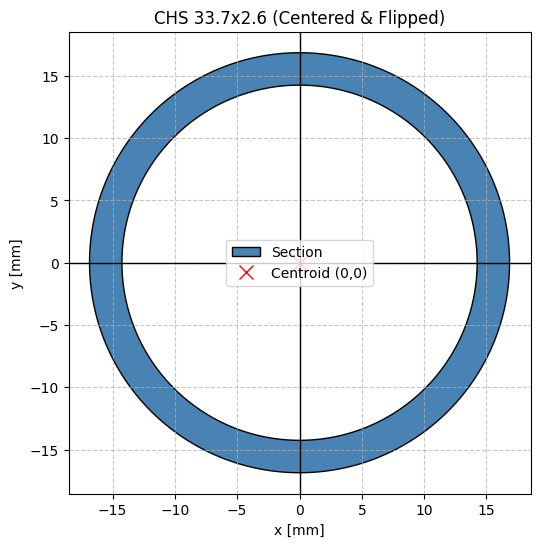

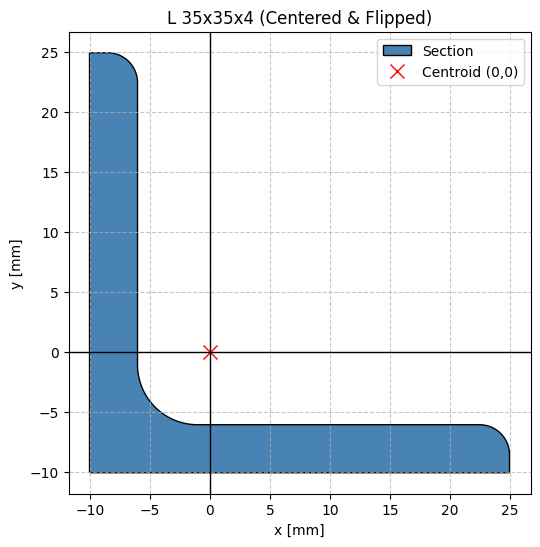

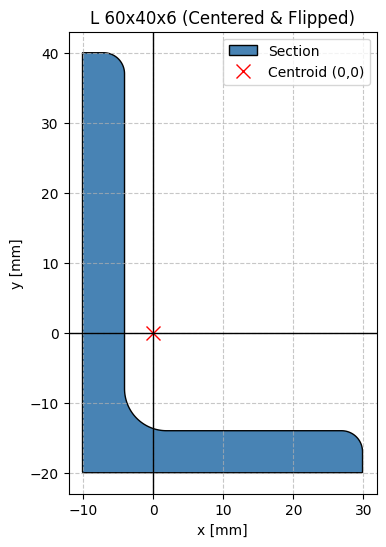

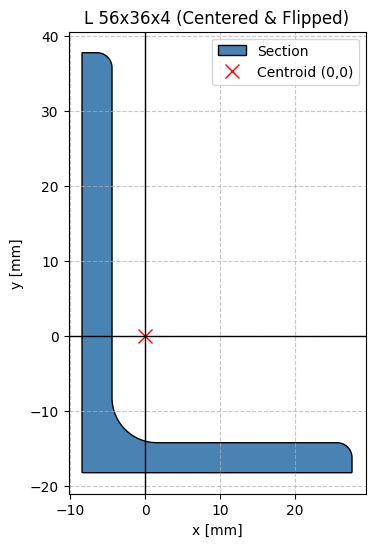

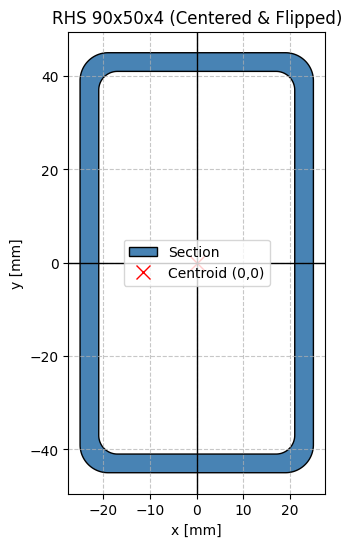

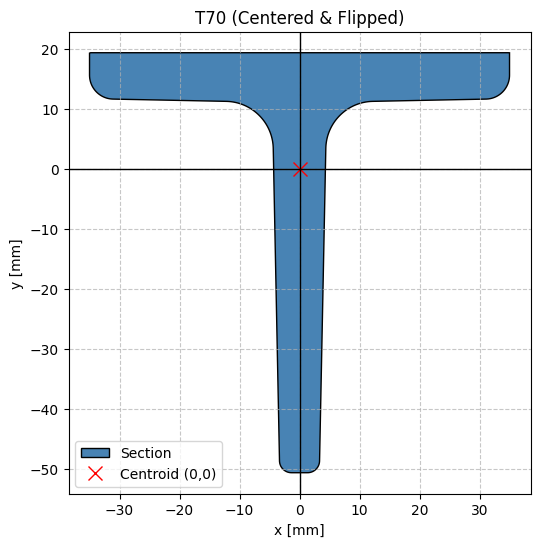

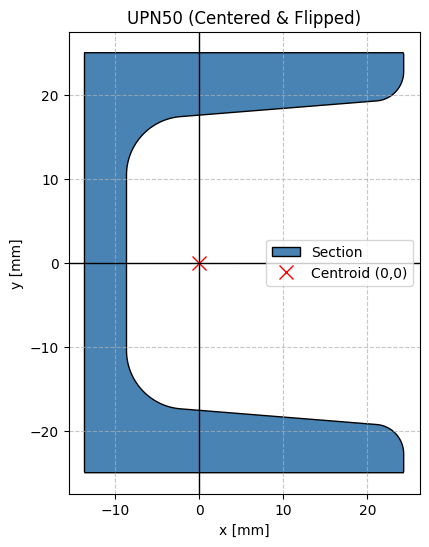

In [50]:
import matplotlib.pyplot as plt


def plot_section(section, title="Cross Section"):
    fig, ax = plt.subplots(figsize=(6, 6))

    # 1. Plot the main body (Exterior)
    x_ext, y_ext = section.polygon.exterior.xy
    ax.fill(x_ext, y_ext, alpha=0.994, fc='steelblue',
            ec='black', label='Section')

    # 2. Plot the holes (Interiors)
    for interior in section.polygon.interiors:
        x_int, y_int = interior.xy
        ax.fill(x_int, y_int, fc='white', ec='black')

    # 3. Mark the Centroid (should be at 0,0)
    ax.plot(0, 0, 'rx', markersize=10, label='Centroid (0,0)')

    # Formatting
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(0, color='black', linewidth=1)  # X-axis
    ax.axvline(0, color='black', linewidth=1)  # Y-axis
    ax.set_title(title)
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
    ax.legend()

    plt.show()


# Visualize your sections
plot_section(chs_profile, "CHS 33.7x2.6 (Centered & Flipped)")
plot_section(l_profile, "L 35x35x4 (Centered & Flipped)")
plot_section(L_profile, "L 60x40x6 (Centered & Flipped)")
plot_section(L2_profile, "L 56x36x4 (Centered & Flipped)")
plot_section(RHS_profile, "RHS 90x50x4 (Centered & Flipped)")
plot_section(T70_profile, "T70 (Centered & Flipped)")
plot_section(UPN50_profile, "UPN50 (Centered & Flipped)")

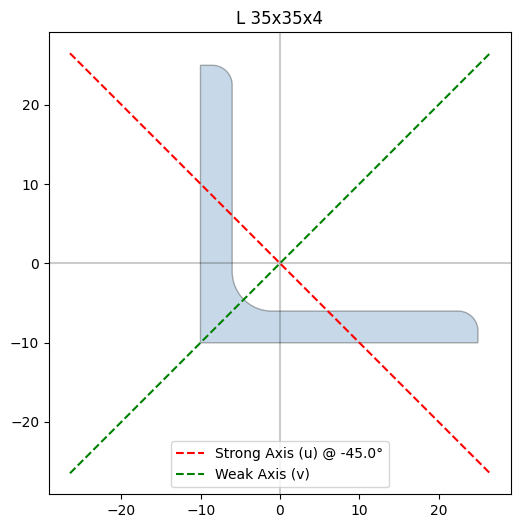

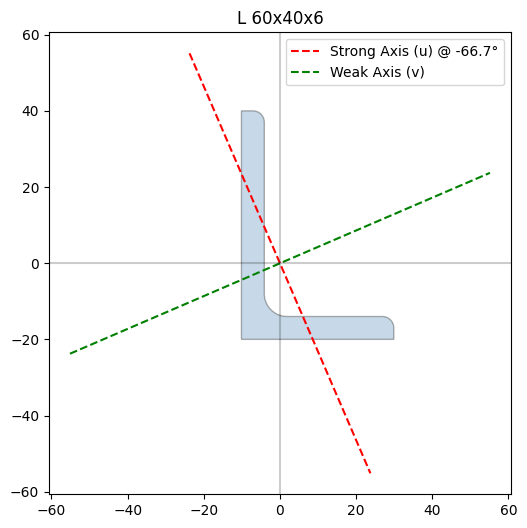

In [41]:
import numpy as np


def plot_with_principal_axes(section, title="Section with Principal Axes"):
    Ix, Iy, Ixy = section.calculate_inertia()
    alpha_rad = 0.5 * np.arctan2(2 * Ixy, Iy - Ix)

    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot geometry
    x_ext, y_ext = section.polygon.exterior.xy
    ax.fill(x_ext, y_ext, alpha=0.3, fc='steelblue', ec='black')
    for interior in section.polygon.interiors:
        ax.fill(*interior.xy, fc='white', ec='black')

    # Axis length (use bounding box to scale the lines)
    length = max(section.xRc, section.yTc) * 1.5

    # Strong Axis (u) - Red
    ux, uy = np.cos(alpha_rad) * length, np.sin(alpha_rad) * length
    ax.plot([-ux, ux], [-uy, uy], 'r--',
            label=f'Strong Axis (u) @ {np.degrees(alpha_rad):.1f}°')

    # Weak Axis (v) - Green
    vx, vy = np.cos(alpha_rad + np.pi/2) * \
        length, np.sin(alpha_rad + np.pi/2) * length
    ax.plot([-vx, vx], [-vy, vy], 'g--', label='Weak Axis (v)')

    ax.set_aspect('equal')
    ax.axhline(0, color='black', alpha=0.2)
    ax.axvline(0, color='black', alpha=0.2)
    ax.set_title(title)
    ax.legend()
    plt.show()


# Run it for your L-profiles
plot_with_principal_axes(l_profile, "L 35x35x4")
plot_with_principal_axes(L_profile, "L 60x40x6")

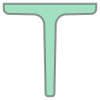

In [42]:
T70_profile.polygon

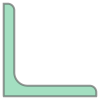

In [43]:
l_profile.polygon

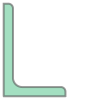

In [44]:
L_profile.polygon

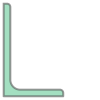

In [45]:
L2_profile.polygon

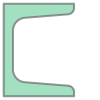

In [51]:
UPN50_profile.polygon

In [46]:
import math


def slope_pct_to_deg(percent):
    """Converts a slope percentage to degrees."""
    # Slope % = (rise / run) * 100
    # tan(angle) = rise / run
    decimal_slope = percent / 100
    angle_rad = math.atan(decimal_slope)
    return math.degrees(angle_rad)


# Example usage:
print(f"2% slope in degrees: {slope_pct_to_deg(8):.5f}°")

2% slope in degrees: 4.57392°
